<a href="https://colab.research.google.com/github/RodolfoViegas/correlacao_e_regressao/blob/main/trabalho_corre_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_csv('/content/Gr6_DIAMANTE.XLS - Plan1.csv',skiprows=1)
df.head()

,PREÇO,QUILATE,PROFUNDIDADE,PLANURA,COR,CLARIDADE
0,6958,1,"60,5",65,3,4
1,5885,1,"59,2",65,5,4
2,6333,"1,01","62,3",55,4,4
3,4299,"1,01","64,4",62,5,5
4,9589,"1,02","63,9",58,2,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PREÇO         30 non-null     int64 
 1   QUILATE       30 non-null     object
 2   PROFUNDIDADE  30 non-null     object
 3   PLANURA       30 non-null     int64 
 4   COR           30 non-null     int64 
 5   CLARIDADE     30 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ KB


Exclusão das colunas não necessárias à analise.

In [ ]:
df.drop(columns=['PLANURA ','COR','CLARIDADE'], inplace=True)

In [ ]:
df.head()

,PREÇO,QUILATE,PROFUNDIDADE
0,6958,1,"60,5"
1,5885,1,"59,2"
2,6333,"1,01","62,3"
3,4299,"1,01","64,4"
4,9589,"1,02","63,9"


Substituição da vírgula por ponto para mudança no tipo das colunas, de string a float.

In [ ]:
df['PROFUNDIDADE'] = df['PROFUNDIDADE'].str.replace(',','.')

In [ ]:
df['QUILATE'] = df['QUILATE'].str.replace(',','.')

In [ ]:
df['PROFUNDIDADE'] = df['PROFUNDIDADE'].astype('float')
df['QUILATE'] = df['QUILATE'].astype('float')
df['PREÇO'] = df['PREÇO'].astype('float')

In [ ]:
df.head(10)

,PREÇO,QUILATE,PROFUNDIDADE
0,6958.0,1.00,60.5
1,5885.0,1.00,59.2
2,6333.0,1.01,62.3
3,4299.0,1.01,64.4
4,9589.0,1.02,63.9
5,6921.0,1.04,60.0
6,4426.0,1.04,62.0
7,6885.0,1.07,63.6
8,5826.0,1.07,61.6
9,3670.0,1.11,60.4


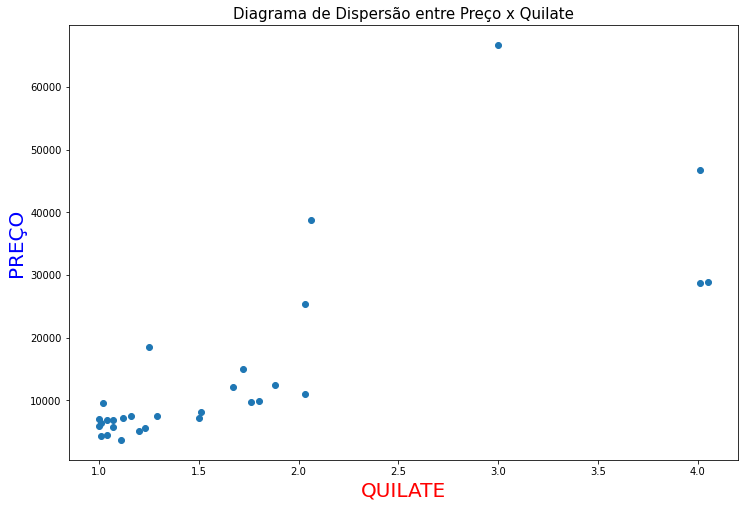

In [ ]:
# Disperção entre Y (PREÇO) e x1 (QUILATE)

plt.figure(figsize=(12,8))
plt.scatter(df['QUILATE'],df['PREÇO'])
plt.ylabel('PREÇO',color='blue',fontsize=20)
plt.xlabel("QUILATE",color='red',fontsize=20)
plt.title('Diagrama de Dispersão entre Preço x Quilate',fontsize=15)
plt.show()

<Figure size 432x288 with 0 Axes>

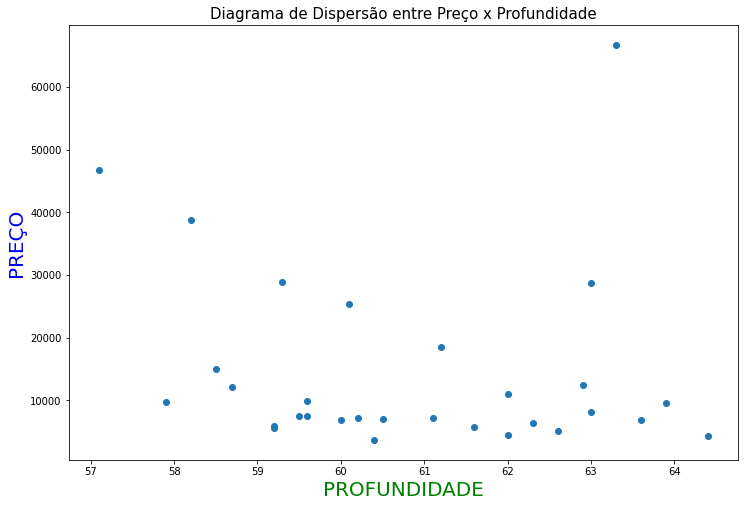

In [ ]:
# Disperção entre Y (PREÇO) e x2 (PROFUNDIDADE)

plt.clf()
plt.figure(figsize=(12,8))
plt.ylabel('PREÇO',color='blue',fontsize=20)
plt.xlabel("PROFUNDIDADE",color='green',fontsize=20)
plt.scatter(df['PROFUNDIDADE'],df['PREÇO'])
plt.title('Diagrama de Dispersão entre Preço x Profundidade',fontsize=15)
plt.show()

In [ ]:
df["QUILATE²"]= [x**2 for x in df['QUILATE']]

In [ ]:
df["PROFUNDIDADE²"]= [x**2 for x in df['PROFUNDIDADE']]

In [ ]:
df["PREÇO²"]= [x**2 for x in df['PREÇO']]

In [ ]:
df["QUILA·PREÇO"]= [df.loc[x,'QUILATE'] * df.loc[x,'PREÇO']  for x in range(30)]

In [ ]:
df["PROFU·PREÇO"]= [df.loc[x,'PROFUNDIDADE'] * df.loc[x,'PREÇO']  for x in range(30)]

In [ ]:
df.head()

,PREÇO,QUILATE,PROFUNDIDADE,QUILATE²,PROFUNDIDADE²,PREÇO²,QUILA·PREÇO,PROFU·PREÇO
0,6958.0,1.00,60.5,1.0000,3660.25,48413764.0,6958.00,420959.0
1,5885.0,1.00,59.2,1.0000,3504.64,34633225.0,5885.00,348392.0
2,6333.0,1.01,62.3,1.0201,3881.29,40106889.0,6396.33,394545.9
3,4299.0,1.01,64.4,1.0201,4147.36,18481401.0,4341.99,276855.6
4,9589.0,1.02,63.9,1.0404,4083.21,91948921.0,9780.78,612737.1


In [ ]:
# Índice de correlação de Pearson (r) para Y,X1 e Y,X2
Y = df.loc[0:,'PREÇO']
X1 = df.loc[0:,'QUILATE']
Y.corr(X1)

0.7674860667629548

In [ ]:
# t_observado para teste de existência de correlação positiva populacional dado nível de significância 5% e g.l. n-2
# na tabela t-Studente o valor de t crítico é 2,048

t_obs_pr_qui = (Y.corr(X1) * np.sqrt(len(df['PREÇO']-2))) / np.sqrt(1-Y.corr(X1)**2)
t_obs_pr_qui

6.557354099788333

In [ ]:
Y = df.loc[0:,'PREÇO']
X2 = df.loc[0:,'PROFUNDIDADE']
Y.corr(X2)

-0.13056871593754826

In [ ]:
# t_observado para teste de existência de correlação negativa populacional dado nível de significância 5% e g.l. n-2
# na tabela t-Studente o valor de t crítico é -2,048

t_obs_pr_pro = (Y.corr(X2) * np.sqrt(len(df['PREÇO']-2))) / np.sqrt(1-Y.corr(X2)**2)
t_obs_pr_pro

-0.7213294223646638

In [ ]:
df['PREÇO'].describe()

count       30.000000
mean     14440.866667
std      14530.231098
min       3670.000000
25%       6471.000000
50%       7830.000000
75%      14348.000000
max      66780.000000
Name: PREÇO, dtype: float64

# Começo da PArte B, abaixo plotagem do  gráfico com linha de regressão

Text(0.5, 0, 'QUILATE')

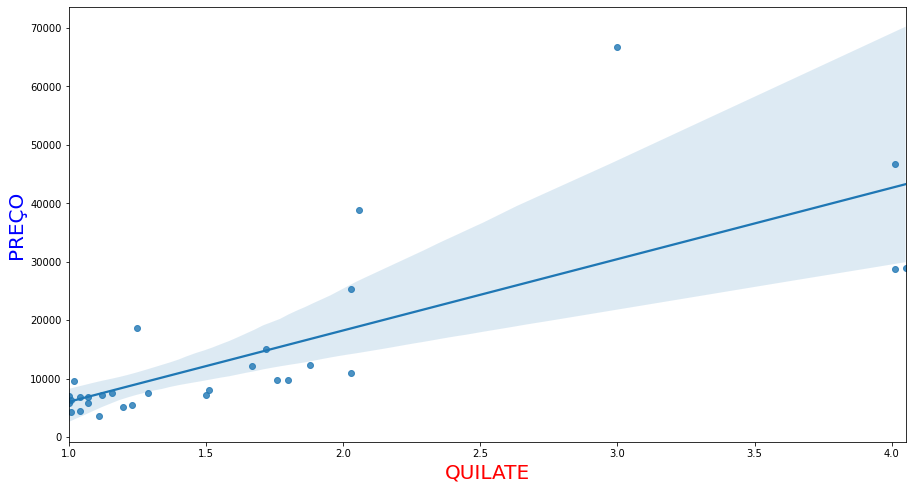

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x="QUILATE", y="PREÇO", data=df)
plt.ylabel('PREÇO',color='blue',fontsize=20)
plt.xlabel("QUILATE",color='red',fontsize=20)

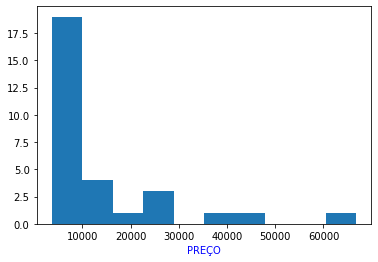

In [ ]:
plt.clf()
plt.hist(df['PREÇO'])
plt.xlabel("PREÇO",color='blue',fontsize=10)
plt.show()

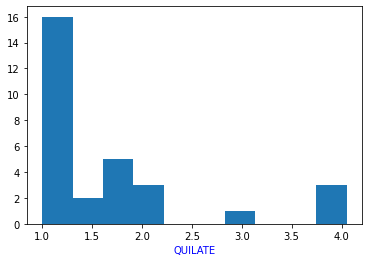

In [ ]:
plt.clf()
plt.hist(df['QUILATE'])
plt.xlabel("QUILATE",color='blue',fontsize=10)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()

X = df['QUILATE'].values
X = np.reshape(X,(X.shape[0],1))
y = df['PREÇO']
reg.fit(X,y)
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [ ]:
# coeficiente angular
reg.coef_

array([12200.50229859])

In [ ]:
# Intercepto

reg.intercept_

-6157.648047453529

In [ ]:
# teste de predição
reg.predict([[1.0]])

array([6042.85425114])

In [ ]:
# Coeficiente de determinação r²
reg.score(X,y)

0.5890348626752706

In [ ]:
# Criando coluna com os resíduos
y_chapeu=[]
for i in df.loc[:,'QUILATE']:
  y_chapeu.append(reg.predict([[i]])[0])

In [ ]:
df_reg_preço_quilate = df[['PREÇO',"QUILATE"]].copy()
df_reg_preço_quilate['RESÍDUOS(y - ŷ)'] = pd.Series(df_reg_preço_quilate['PREÇO'] - y_chapeu)
df_reg_preço_quilate.head(10)

,PREÇO,QUILATE,RESÍDUOS(y - ŷ)
0,6958.0,1.00,915.145749
1,5885.0,1.00,-157.854251
2,6333.0,1.01,168.140726
3,4299.0,1.01,-1865.859274
4,9589.0,1.02,3302.135703
5,6921.0,1.04,390.125657
6,4426.0,1.04,-2104.874343
7,6885.0,1.07,-11.889412
8,5826.0,1.07,-1070.889412
9,3670.0,1.11,-3714.909504


In [ ]:
y_medio = df_reg_preço_quilate['PREÇO'].values.mean()
y = df_reg_preço_quilate['PREÇO'].values



# somatório de (y_chapeu - y_médio)²
variacao_explicada = ((y_chapeu - y_medio)**2).sum()

#Somatório de (y - y_chapeu)²
variacao_nao_explicada = ((y - y_chapeu)**2).sum()


variacao_total = variacao_explicada + variacao_nao_explicada

print(variacao_explicada, variacao_nao_explicada, variacao_total)

print('R-quadrado: ', variacao_explicada/variacao_total)

3606484258.7796416 2516216598.6870265 6122700857.466668
R-quadrado:  0.5890348626752708


In [ ]:
# Erro padrão estimado

quadrado = df_reg_preço_quilate['RESÍDUOS(y - ŷ)']**2
erro_padrao_estimado = np.sqrt(quadrado.sum()/28)
erro_padrao_estimado

9479.708778466596

Text(0.5, 0, 'QUILATE')

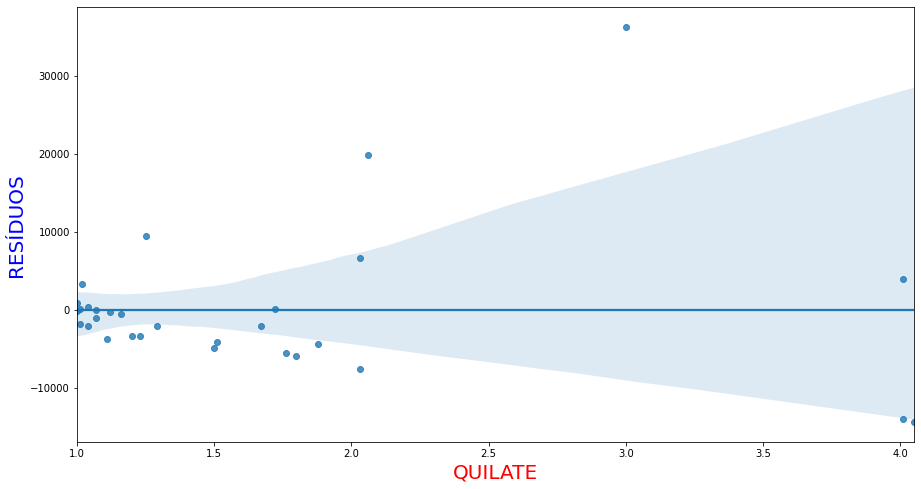

In [ ]:
# Gráfico dos resíduos vs quilate, os resíduos não se distribuem normalmente em torno da média 0 (reta)

plt.figure(figsize=(15,8))
sns.regplot(x=df_reg_preço_quilate["QUILATE"].values, y=df_reg_preço_quilate["RESÍDUOS(y - ŷ)"].values)
plt.ylabel('RESÍDUOS',color='blue',fontsize=20)
plt.xlabel("QUILATE",color='red',fontsize=20)

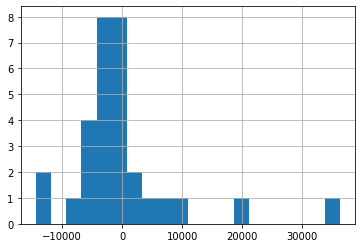

In [ ]:
df_reg_preço_quilate['RESÍDUOS(y - ŷ)'].hist(bins=20)

## Ajuste da reta de regressão com transformação logarítmica

In [ ]:
df_reg_preço_quilate['PREÇO']=np.log(df_reg_preço_quilate['PREÇO'].values)
df_reg_preço_quilate['QUILATE']=np.log(df_reg_preço_quilate['QUILATE'].values)

df_reg_preço_quilate.drop('RESÍDUOS(y - ŷ)',axis=1,inplace=True)

In [ ]:
reg_ajustada = LinearRegression()

X = df_reg_preço_quilate['QUILATE'].values
X = np.reshape(X,(X.shape[0],1))
y = df_reg_preço_quilate['PREÇO']
reg_ajustada.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
novo_y_chapeu=[]
for i in df_reg_preço_quilate.loc[0:,'QUILATE']:
  
  novo_y_chapeu.append(reg_ajustada.predict([[i]])[0])
df_reg_preço_quilate['RESÍDUOS(y - ŷ)'] = df_reg_preço_quilate['PREÇO'].values - np.array(novo_y_chapeu)

In [ ]:
df_reg_preço_quilate.head(10)

,PREÇO,QUILATE,RESÍDUOS(y - ŷ)
0,8.847647,0.000000,0.207897
1,8.680162,0.000000,0.040411
2,8.753529,0.009950,0.099166
3,8.366138,0.009950,-0.288225
4,9.168372,0.019803,0.499540
5,8.842316,0.039221,0.144967
6,8.395252,0.039221,-0.302097
7,8.837100,0.067659,0.097990
8,8.670086,0.067659,-0.069025
9,8.207947,0.104360,-0.585061


Text(0.5, 0, 'QUILATE')

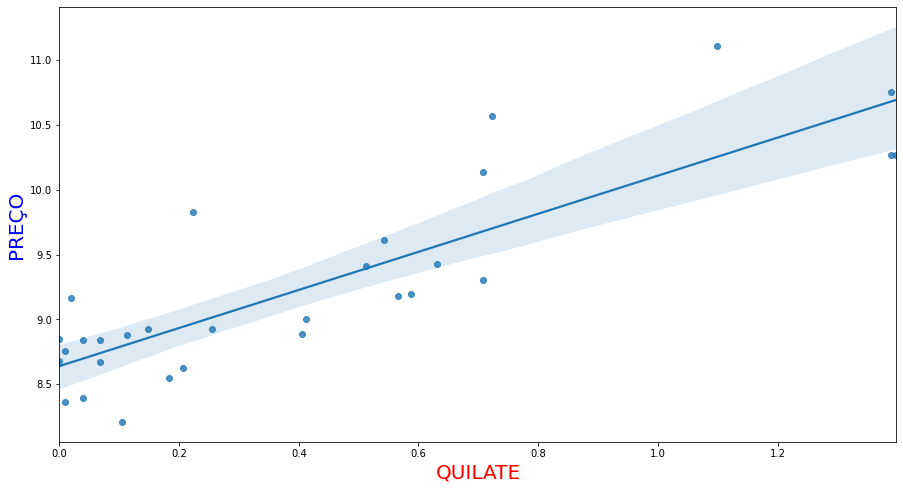

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x="QUILATE", y="PREÇO", data=df_reg_preço_quilate)
plt.ylabel('PREÇO',color='blue',fontsize=20)
plt.xlabel("QUILATE",color='red',fontsize=20)

Text(0.5, 0, 'QUILATE')

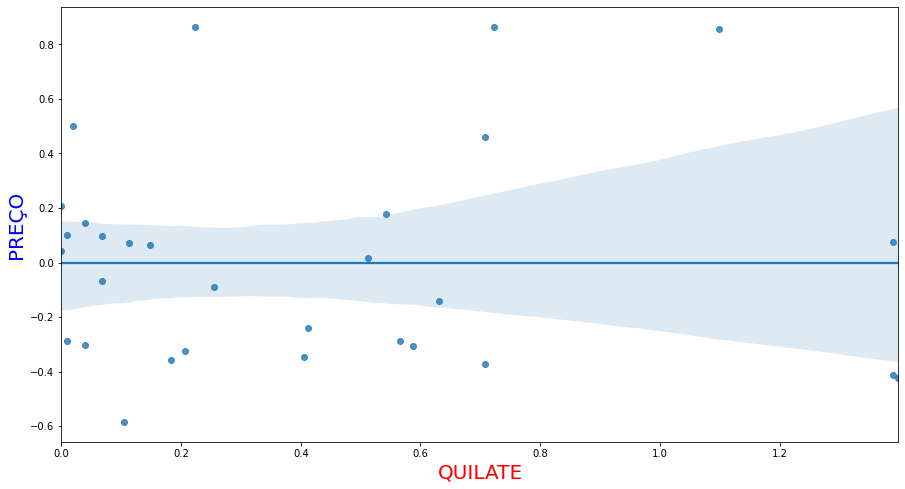

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x="QUILATE", y="RESÍDUOS(y - ŷ)", data=df_reg_preço_quilate)
plt.ylabel('PREÇO',color='blue',fontsize=20)
plt.xlabel("QUILATE",color='red',fontsize=20)

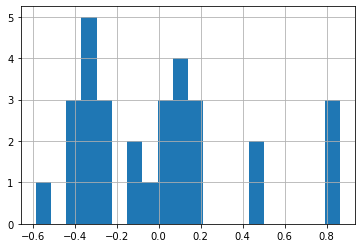

In [ ]:
df_reg_preço_quilate['RESÍDUOS(y - ŷ)'].hist(bins=20)

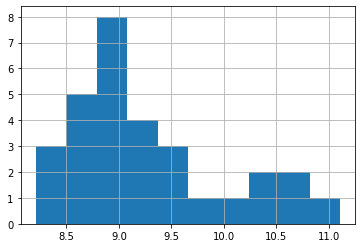

In [ ]:
df_reg_preço_quilate['PREÇO'].hist()

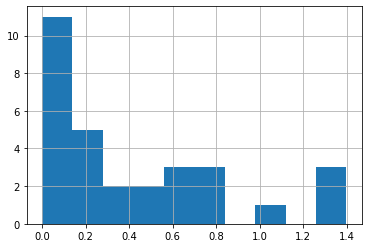

In [ ]:
df_reg_preço_quilate['QUILATE'].hist()

In [ ]:
print(reg_ajustada.coef_,reg_ajustada.intercept_)

[1.46854951] 8.639750538384915


In [ ]:
reg_ajustada.score(X,y)

0.7273562984634712

In [ ]:
# Erro padrão estimado

quadrado = df_reg_preço_quilate['RESÍDUOS(y - ŷ)']**2
erro_padrao_estimado = np.sqrt(quadrado.sum()/28)
erro_padrao_estimado

0.39825832395824945

In [ ]:
# Inferência sobre o modelo. Teste de hipótese de existência de regressão e
# intervalo de confianç
x  = df_reg_preço_quilate['QUILATE'].values

erro_padrao_b = erro_padrao_estimado * np.sqrt(30/ 
                                               (30*(x**2).sum() - x.sum()**2))

In [ ]:
erro_padrao_b

0.16991577894018944

In [ ]:
erro_padrao_b*1.701

0.28902673997726225

In [ ]:
t_observado_b = (1.4685 - 0)/0.1699
t_observado_b

8.643319599764567

In [ ]:
# erro padrão do estimador a
erro_padrao_a = erro_padrao_estimado * np.sqrt(1/30 + (
    (x.sum())**2 / 
    ((30 * (x**2).sum()) - (x.sum())**2)
)
)
erro_padrao_a

0.39628871925945347

In [ ]:
# t-observado de a

t_observado_a = (8.6397 - 0)/ erro_padrao_a

t_observado_a

21.801528986606144

In [ ]:
2.048 * erro_padrao_a

0.8115992970433608

# Regressão de Preço vs Profundidade

Text(0.5, 0, 'PROFUNDIDADE')

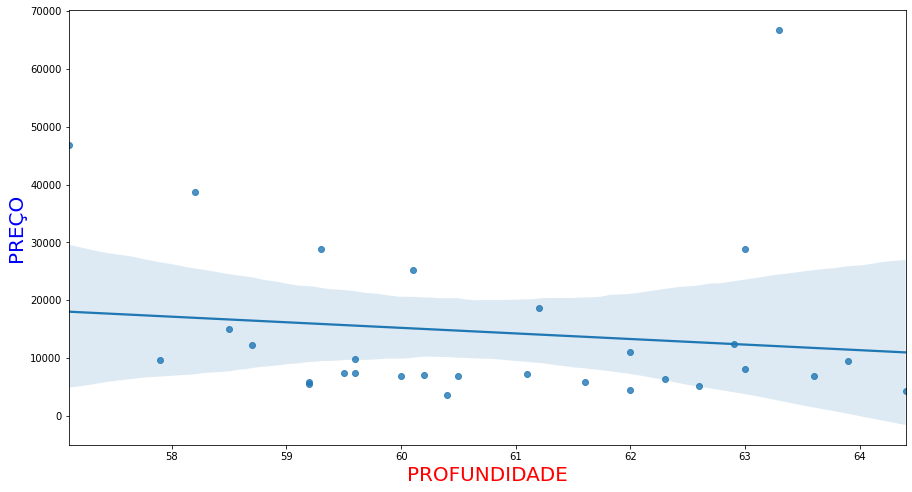

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x="PROFUNDIDADE", y="PREÇO", data=df)
plt.ylabel('PREÇO',color='blue',fontsize=20)
plt.xlabel("PROFUNDIDADE",color='red',fontsize=20)

In [ ]:
# Dataframe para Preço e Profundidade
df_reg_preço_profundidade = df[['PREÇO','PROFUNDIDADE']]

In [ ]:
reg_preco_profu = LinearRegression()

X = df_reg_preço_profundidade['PROFUNDIDADE'].values
X = np.reshape(X,(X.shape[0],1))
y = df_reg_preço_profundidade['PREÇO']
reg_preco_profu.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg_preco_profu.score(X,y)*100

1.7048189581580275

In [ ]:
reg_preco_profu.coef_

array([-964.42779109])

In [ ]:
reg_preco_profu.intercept_

73107.00919894625

In [ ]:
y_chapeu = []

for i in df_reg_preço_profundidade.loc[0:,'PROFUNDIDADE'].values:
  y_chapeu.append(reg_preco_profu.predict([[i]])[0])

In [ ]:
df_reg_preço_profundidade['RESÍDUOS(y-ŷ)'] = df_reg_preço_profundidade.loc[0:,'PREÇO'] - np.array(y_chapeu)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_reg_preço_profundidade.head(10)

,PREÇO,PROFUNDIDADE,RESÍDUOS(y-ŷ)
0,6958.0,60.5,-7801.127838
1,5885.0,59.2,-10127.883966
2,6333.0,62.3,-6690.157814
3,4299.0,64.4,-6698.859452
4,9589.0,63.9,-1891.073348
5,6921.0,60.0,-8320.341733
6,4426.0,62.0,-8886.486151
7,6885.0,63.6,-4884.401685
8,5826.0,61.6,-7872.257268
9,3670.0,60.4,-11185.570617


In [ ]:
reg_preco_profu.predict([[60.5]])

array([14759.12783773])

In [ ]:
# Erro padrão da predição

quadrado = df_reg_preço_profundidade['RESÍDUOS(y-ŷ)']**2
erro_padrao_estimado = np.sqrt(quadrado.sum()/28)
erro_padrao_estimado

14660.832041893695

In [ ]:
# Cálculo das partes explicadas do modelo Preço vs Profundida

y_medio = df_reg_preço_profundidade['PREÇO'].values.mean()
y = df_reg_preço_profundidade['PREÇO'].values



# somatório de (y_chapeu - y_médio)²
variacao_explicada = ((y_chapeu - y_medio)**2).sum()

#Somatório de (y - y_chapeu)²
variacao_nao_explicada = ((y - y_chapeu)**2).sum()


variacao_total = variacao_explicada + variacao_nao_explicada

print(variacao_explicada, variacao_nao_explicada, variacao_total)

print('R-quadrado: ', variacao_explicada/variacao_total)

104380964.96939519 6018319892.497271 6122700857.466666
R-quadrado:  0.01704818958158017


In [ ]:
x  = df_reg_preço_profundidade['PROFUNDIDADE'].values

erro_padrao_b_pre_pro = erro_padrao_estimado * np.sqrt(30/ 
                                               (30*(x**2).sum() - x.sum()**2))

erro_padrao_b_pre_pro

1383.9413362451508

In [ ]:
t_observado_b = (-964.427 - 0) / erro_padrao_b_pre_pro
t_observado_b

-0.6968698562156119

In [ ]:
-0.69> -0.13

False

## Regressão Múltipla entre Preço (Y), Quilate (X1) e Profundidade (X2)

In [ ]:
df.head()

,PREÇO,QUILATE,PROFUNDIDADE,QUILATE²,PROFUNDIDADE²,PREÇO²,QUILA·PREÇO,PROFU·PREÇO
0,6958.0,1.00,60.5,1.0000,3660.25,48413764.0,6958.00,420959.0
1,5885.0,1.00,59.2,1.0000,3504.64,34633225.0,5885.00,348392.0
2,6333.0,1.01,62.3,1.0201,3881.29,40106889.0,6396.33,394545.9
3,4299.0,1.01,64.4,1.0201,4147.36,18481401.0,4341.99,276855.6
4,9589.0,1.02,63.9,1.0404,4083.21,91948921.0,9780.78,612737.1


In [ ]:
df.drop(columns=['QUILATE²' ,	'PROFUNDIDADE²' ,	'PREÇO²' ,	'QUILA·PREÇO' ,	'PROFU·PREÇO'],inplace=True)

In [ ]:
df.head()

,PREÇO,QUILATE,PROFUNDIDADE,RESÍDUOS(y-ŷ)
0,6958.0,1.00,60.5,1012.508296
1,5885.0,1.00,59.2,143.200072
2,6333.0,1.01,62.3,-17.194779
3,4299.0,1.01,64.4,-2380.235341
4,9589.0,1.02,63.9,2865.439341


In [ ]:
multi_reg = LinearRegression()
multi_reg.fit(df[['QUILATE' ,	'PROFUNDIDADE']],df['PREÇO'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_chapeu = multi_reg.predict(df[['QUILATE' ,	'PROFUNDIDADE']])

In [ ]:
df['RESÍDUOS(y-ŷ)'] = df['PREÇO'] - y_chapeu

In [ ]:
multi_reg.intercept_

-15800.841066625655

In [ ]:
multi_reg.coef_

array([12266.83087991,   156.68598166])

In [ ]:
# Coeficiente de determinação r²

multi_reg.score(df[['QUILATE' ,	'PROFUNDIDADE']],df['PREÇO'])

0.5894674392681984

In [ ]:
quadrado = df['RESÍDUOS(y-ŷ)']**2
erro_padrao_estimado_multi_reg = np.sqrt(quadrado.sum()/28)
erro_padrao_estimado_multi_reg

9474.718355426921

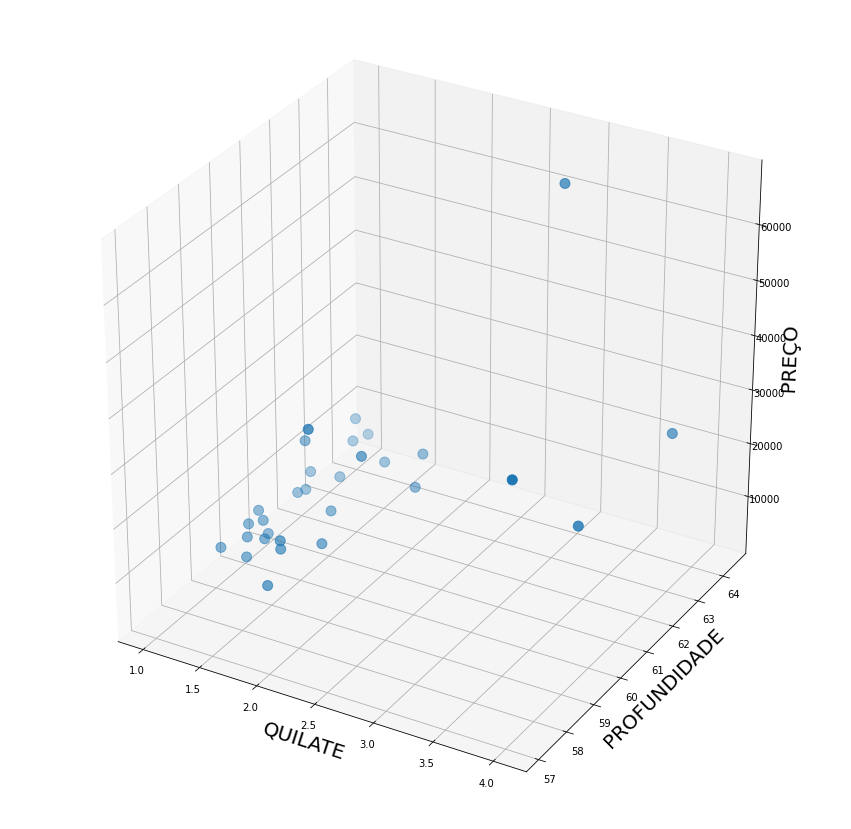

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['QUILATE']
y = df['PROFUNDIDADE']
z = df['PREÇO']

ax.set_xlabel("QUILATE",fontsize=20)
ax.set_ylabel("PROFUNDIDADE",fontsize=20)
ax.set_zlabel("PREÇO",fontsize=20)
fig.set_size_inches(15,15)
ax.scatter(x, y, z,s=100)

plt.show()

In [ ]:
# y = -15800.841 + 12266.83·x1 + 156.68·x2

In [ ]:
# teste com modelo log(y) = a + b1log(x1) + b2x2

# novo dataframe
df_log_log_level = df[['PREÇO','QUILATE','PROFUNDIDADE']]


df_log_log_level['PREÇO'] = np.log(df_log_log_level['PREÇO'])
df_log_log_level['QUILATE'] = np.log(df_log_log_level['QUILATE'])
df_log_log_level.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PREÇO,QUILATE,PROFUNDIDADE
0,8.847647,0.000000,60.5
1,8.680162,0.000000,59.2
2,8.753529,0.009950,62.3
3,8.366138,0.009950,64.4
4,9.168372,0.019803,63.9


In [ ]:
multi_reg2 = LinearRegression()
multi_reg2.fit(df_log_log_level[['QUILATE' ,	'PROFUNDIDADE']],df_log_log_level['PREÇO'])
y_chapeu2 = multi_reg2.predict(df_log_log_level[['QUILATE' ,	'PROFUNDIDADE']])
multi_reg2.score(df_log_log_level[['QUILATE' ,	'PROFUNDIDADE']],df_log_log_level['PREÇO'])

0.7278178199544604

In [ ]:
df_log_log_level['RESÍDUOS(y-ŷ)'] = df_log_log_level['PREÇO'] - y_chapeu2


In [ ]:
quadrado = df_log_log_level['RESÍDUOS(y-ŷ)']**2
erro_padrao_estimado_multi_reg2 = np.sqrt(quadrado.sum()/28)
erro_padrao_estimado_multi_reg2

0.39792110247674106

<Figure size 432x288 with 0 Axes>

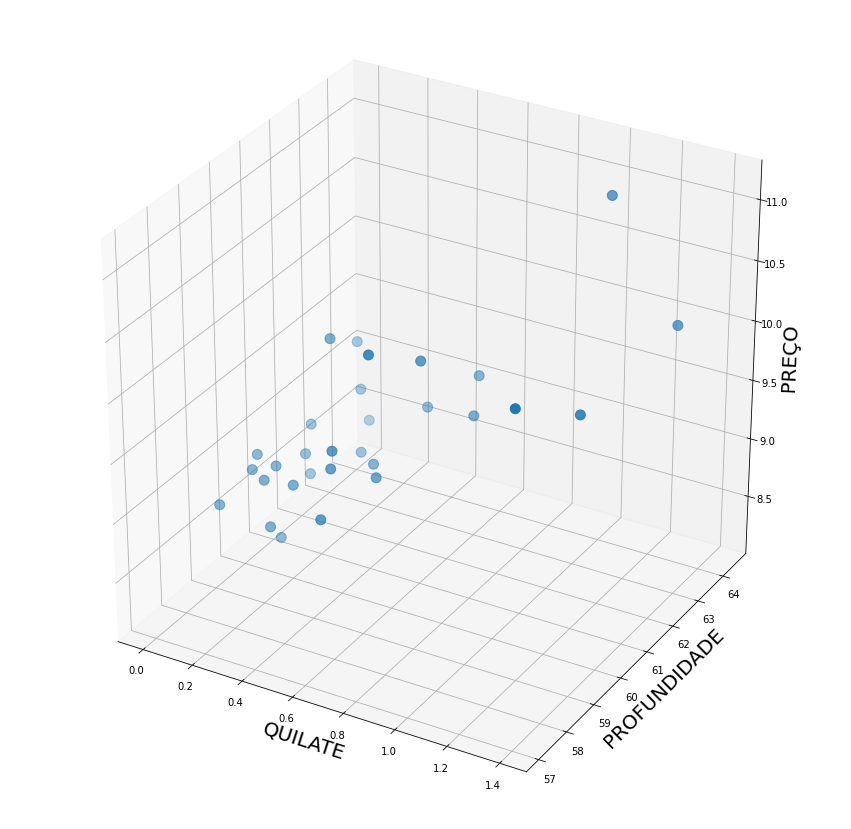

In [ ]:
plt.clf()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_log_log_level['QUILATE']
y = df_log_log_level['PROFUNDIDADE']
z = df_log_log_level['PREÇO']

ax.set_xlabel("QUILATE",fontsize=20)
ax.set_ylabel("PROFUNDIDADE",fontsize=20)
ax.set_zlabel("PREÇO",fontsize=20)
fig.set_size_inches(15,15)
ax.scatter(x, y, z,s=100)

plt.show()

In [ ]:
# teste com modelo log(y) = a + b1log(x1) + b2log(x2)

# novo dataframe
df_log_log_log = df[['PREÇO','QUILATE','PROFUNDIDADE']]


df_log_log_log['PREÇO'] = np.log(df_log_log_log['PREÇO'])
df_log_log_log['QUILATE'] = np.log(df_log_log_log['QUILATE'])
df_log_log_log['PROFUNDIDADE'] = np.log(df_log_log_log['PROFUNDIDADE'])
df_log_log_log.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,PREÇO,QUILATE,PROFUNDIDADE
0,8.847647,0.000000,4.102643
1,8.680162,0.000000,4.080922
2,8.753529,0.009950,4.131961
3,8.366138,0.009950,4.165114
4,9.168372,0.019803,4.157319


In [ ]:
multi_reg3 = LinearRegression()
multi_reg3.fit(df_log_log_log[['QUILATE' ,	'PROFUNDIDADE']],df_log_log_log['PREÇO'])
y_chapeu3 = multi_reg3.predict(df_log_log_log[['QUILATE' ,	'PROFUNDIDADE']])
multi_reg3.score(df_log_log_log[['QUILATE' ,	'PROFUNDIDADE']],df_log_log_log['PREÇO'])

0.7278654677295993

In [ ]:
df_log_log_log['RESÍDUOS(y-ŷ)'] = df_log_log_level['PREÇO'] - y_chapeu3


In [ ]:
quadrado = df_log_log_log['RESÍDUOS(y-ŷ)']**2
erro_padrao_estimado_multi_reg3 = np.sqrt(quadrado.sum()/28)
erro_padrao_estimado_multi_reg3

0.3978862712378582

<Figure size 432x288 with 0 Axes>

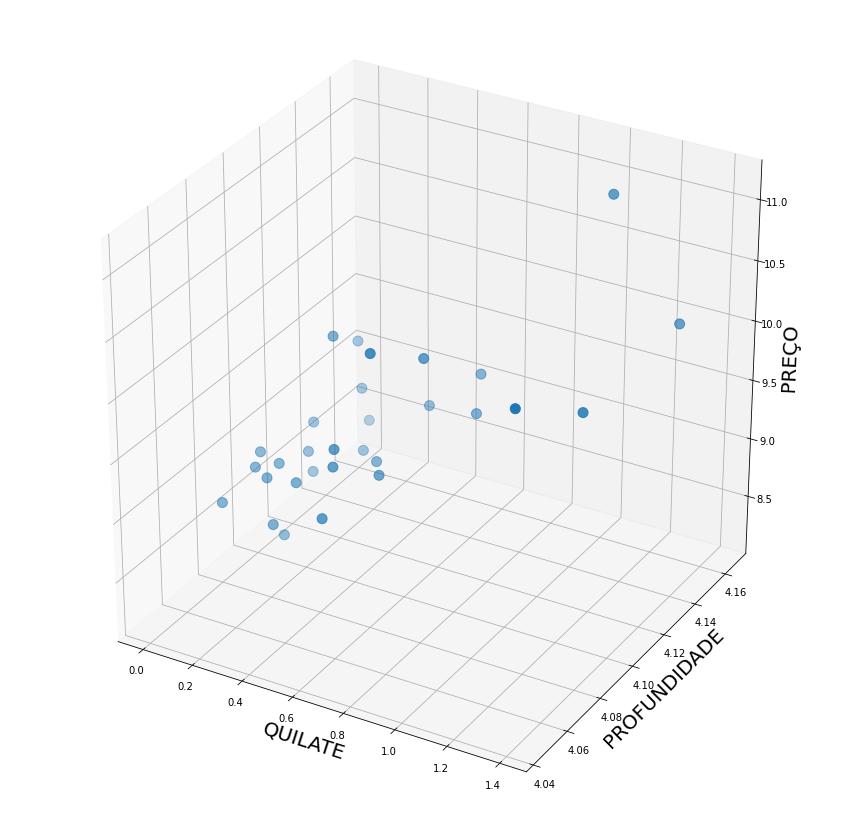

In [ ]:
plt.clf()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_log_log_log['QUILATE'].values
y = df_log_log_log['PROFUNDIDADE'].values
z = df_log_log_log['PREÇO'].values
z2 = y_chapeu3


ax.set_xlabel("QUILATE",fontsize=20)
ax.set_ylabel("PROFUNDIDADE",fontsize=20)
ax.set_zlabel("PREÇO",fontsize=20)
fig.set_size_inches(15,15)
ax.scatter(x, y, z,s=100)

plt.show()

<Figure size 432x288 with 0 Axes>

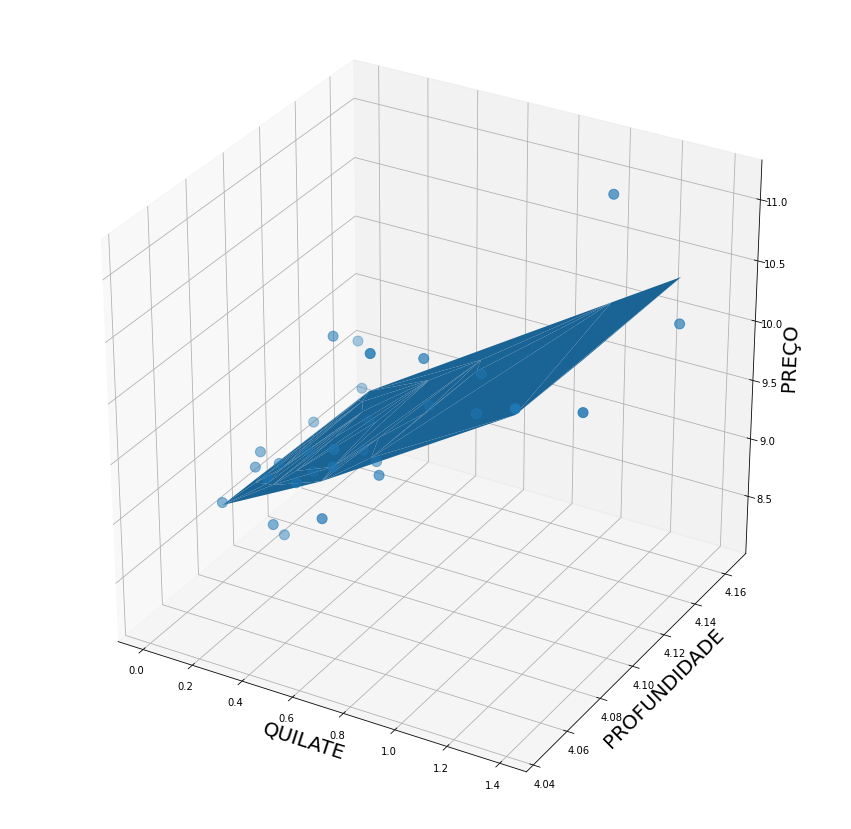

In [ ]:
plt.clf()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_log_log_log['QUILATE'].values
y = df_log_log_log['PROFUNDIDADE'].values
z = df_log_log_log['PREÇO'].values
z2 = y_chapeu3


ax.set_xlabel("QUILATE",fontsize=20)
ax.set_ylabel("PROFUNDIDADE",fontsize=20)
ax.set_zlabel("PREÇO",fontsize=20)
fig.set_size_inches(15,15)
ax.scatter(x, y, z,s=100)
ax.plot_trisurf(x, y,z2)
plt.show()

In [ ]:
r2 = multi_reg3.score(df_log_log_log[['QUILATE' ,	'PROFUNDIDADE']],df_log_log_log['PREÇO'])

r2_ajustado = 1-(1-r2)*((30-1)/(30-2-1))
r2_ajustado

0.7077073542280881

In [ ]:
# teste com modelo y = a + b1log(x1) + b2log(x2)

# novo dataframe
df_level_log_log = df[['PREÇO','QUILATE','PROFUNDIDADE']]


df_level_log_log['PREÇO'] = df_level_log_log['PREÇO']
df_level_log_log['QUILATE'] = np.log(df_level_log_log['QUILATE'])
df_level_log_log['PROFUNDIDADE'] = np.log(df_level_log_log['PROFUNDIDADE'])
df_level_log_log.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,PREÇO,QUILATE,PROFUNDIDADE
0,6958.0,0.000000,4.102643
1,5885.0,0.000000,4.080922
2,6333.0,0.009950,4.131961
3,4299.0,0.009950,4.165114
4,9589.0,0.019803,4.157319


In [ ]:
multi_reg4 = LinearRegression()
multi_reg4.fit(df_level_log_log[['QUILATE' ,	'PROFUNDIDADE']],df_level_log_log['PREÇO'])
y_chapeu4 = multi_reg4.predict(df_level_log_log[['QUILATE' ,	'PROFUNDIDADE']])
multi_reg4.score(df_level_log_log[['QUILATE' ,	'PROFUNDIDADE']],df_level_log_log['PREÇO'])

0.610454896235944